In [1]:
from functools  import partial
import numpy as np

In [2]:
def e(t, v, i, a, L, d, h, t0 = -10):
    return (
        1/16*((2*L*i - 2*t*v - d + 2*h)*np.abs(-2*L*i + 2*t*v + d - 2*h) - 
          (2*L*i - 2*t*v - d)*np.abs(-2*L*i + 2*t*v + d) - 
          (2*L*i - 2*t*v + d + 2*h)*np.abs(-2*L*i + 2*t*v - d - 2*h) + 
          (2*L*i - 2*t*v + d)*np.abs(-2*L*i + 2*t*v - d) - 
          (2*L*i - 2*t0*v - d + 2*h)*np.abs(-2*L*i + 2*t0*v + d - 2*h) + 
          (2*L*i - 2*t0*v - d)*np.abs(-2*L*i + 2*t0*v + d) + 
          (2*L*i - 2*t0*v + d + 2*h)*np.abs(-2*L*i + 2*t0*v - d - 2*h) - 
          (2*L*i - 2*t0*v + d)*np.abs(-2*L*i + 2*t0*v - d))*a/h
    )

def t1(v, i, L, d):
    return (L*i+d/2)/v
def t2(v, i, L, d):
    t1_ = t1(v, i, L, d)
    return t1_ + h/v
def t3(v, i, L, d):
    t2_ = t2(v, i, L, d)
    return t2_ + (d-h)/v
def t4(v, i, L, d):
    t3_ = t3(v, i, L, d)
    return t3_ + h/v

In [3]:
def simulate_events(
    N = 100,
    threshold = 0.5,
    offset = 5,
    a=10, 
    L=0.1, 
    h=0.08, 
    d=0.2, 
    v=0.4, 
    t0=0,
    t1=100,
    t_step = 0.1,
    noise_std = 0,
):

    current_em = np.zeros(N)
    total_em = np.zeros(N)
    events = np.zeros(N)
    eNs = []

    values = dict(a=a, L=L, h=h, d=d, v=v)
    e0 = partial(e, **values)

    t1 = L*N/v

    for time in np.arange(t0,t1,t_step):
        pixel = np.arange(N)
        total_em[pixel] = e0(t=time, i = pixel+1)
        eN = total_em[pixel] - current_em[pixel]
        event_mask = (eN > threshold)
        current_em[event_mask] = total_em[event_mask]
        events[event_mask] += 1
        
    return events, t1-t0

In [4]:
params = dict(
    N = 100,
    threshold = 0.5,
    offset = 5,
    a=10, 
    L=0.1, 
    h=0.08, 
    d=0.2, 
    t0=0,
    t_step = 0.1,
    v = 0.4
)
params["t1"] = params["L"]*params["N"]/params["v"]

In [14]:
vels = np.linspace(0.01,0.4,20)
As = np.logspace(-2,2,20)
out = [[simulate_events(v=v, N = 100, d = 0.1, a = a) for v in vels] for a in As]
events = np.array([[ov[0] for ov in oa] for oa in out])
dts = np.array([[ov[1] for ov in oa] for oa in out])
total_events = np.sum(events, axis = 2)
total_event_rate = total_events/dts


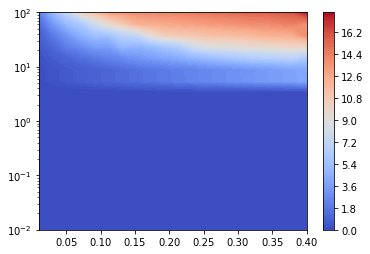

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.contourf(vels, As, total_event_rate, levels = 100, cmap = cm.coolwarm)
plt.yscale("log")
plt.colorbar()

In [17]:
from mpl_toolkits.mplot3d import Axes3D

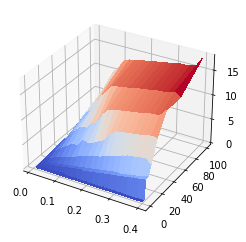

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(vels, As)
Z = total_event_rate
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [32]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

Z = total_event_rate
sh_0, sh_1 = z.shape
Velocity, Gradient = np.meshgrid(vels, As)

fig = go.Figure(data=[go.Surface(
    z=Z, 
    x=Velocity, 
    y=Gradient,
    contours = {
        "x": {"show": True, "start": 0, "end": 0.4, "size": 0.05},
        "y": {"show": True, "start": 0, "end": 100, "size": 10},
        "z": {"show": True, "start": 0, "end": 20, "size": 2}
    },
)])
fig.update_layout(title='Event rate', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict(
                    xaxis_title='Velocity',
                    yaxis_title='Gradient',
                    zaxis_title='Event rate',
                    zaxis = {"nticks": 4},)
                  )

fig.show()

In [38]:
import plotly.graph_objects as go # or plotly.express as px


import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False, port = 8892, threaded = True)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8892/

Dash is running on http://127.0.0.1:8892/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
